In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

import os, sys
parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
db = dm.read_db(base='global_20220430.pkl', add=[])
start = '2010-12-31'
end = '2022-04-30'

# Global sector model

In [56]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=5, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', 
    cash_equiv='ACWI',
    start=start, 
    end=end 
)

  0%|          | 0/137 [00:00<?, ?it/s]

6.342145681381226


<Figure size 432x288 with 0 Axes>

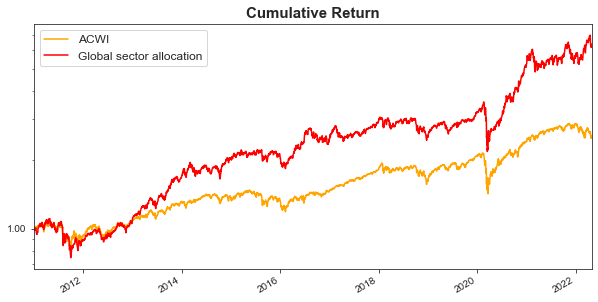

In [51]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'Global sector allocation']
color = ['orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=True);

In [52]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
PE,2.20,2853,7.16,20.57,0.35,-47.00,9.27,15.58,0.59,1.07,30.57,62.22,0.88,84.05
Broker,3.69,2853,12.12,23.26,0.52,-40.38,16.38,18.53,0.85,1.14,24.19,62.96,1.00,84.38
Lithium,1.67,2853,4.59,27.50,0.17,-61.91,-1.35,20.83,-0.07,1.23,51.61,52.59,1.15,-39.85
REIT_US,2.91,2853,9.81,20.02,0.49,-42.40,10.37,15.04,0.59,0.87,20.31,62.22,1.02,89.98
DualMomentum,6.23,2853,17.39,22.92,0.76,-39.25,15.97,18.79,0.87,1.03,20.24,64.44,1.14,91.57


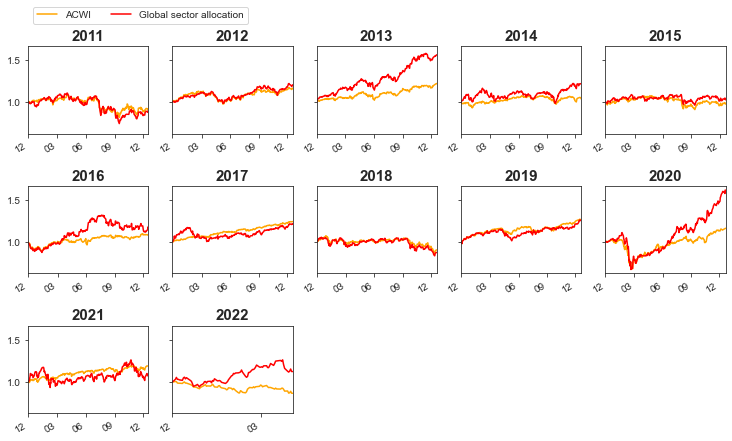

In [53]:
gsam.plot_cum_yearly(strats, names=names, color=color);#, remove=range(2003,2016));

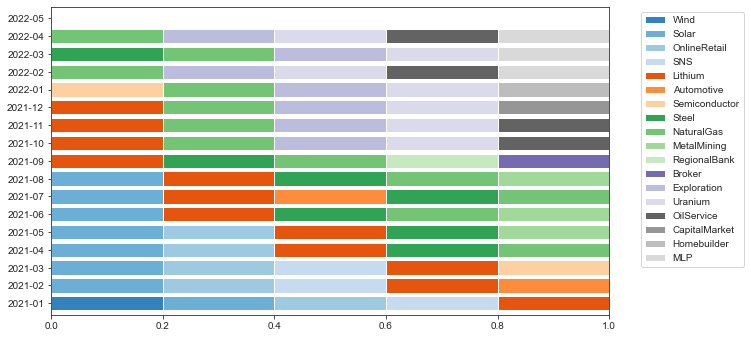

In [54]:
gsam.plot_weight([2021, 2022]);

In [55]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

ACWI    1.0
Name: 2022-04-29 00:00:00, dtype: float64

# US factor model

In [41]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_2, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='US', #'BND_US_Long', 
    cash_equiv='US', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/137 [00:00<?, ?it/s]

5.78928804397583


<Figure size 432x288 with 0 Axes>

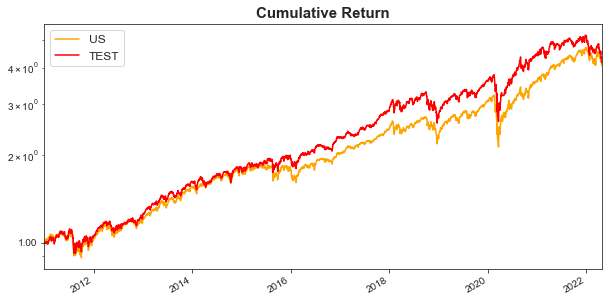

In [42]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [43]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Quality,4.08,2853,13.13,16.89,0.78,-34.06,14.62,13.64,1.11,0.93,4.03,67.41,1.04,97.71
ACWI,2.48,2853,8.29,17.24,0.48,-33.53,11.32,13.91,0.74,1.00,20.31,64.44,0.92,91.16
Growth,4.76,2853,14.65,18.00,0.81,-31.35,17.37,14.91,1.19,0.98,4.03,65.93,1.12,96.94
US,4.06,2853,13.08,16.97,0.77,-33.72,15.67,13.51,1.18,0.95,5.95,70.37,0.90,97.13
Value,3.23,2853,10.81,17.22,0.63,-37.04,12.23,13.50,0.99,0.94,14.82,65.93,0.97,94.76
Momentum,4.41,2853,13.90,18.90,0.74,-34.08,17.17,15.48,1.15,0.97,4.95,64.44,1.19,98.20
DualMomentum,4.17,2853,13.34,17.69,0.75,-31.02,16.31,15.25,1.10,0.94,4.61,63.70,1.20,98.35


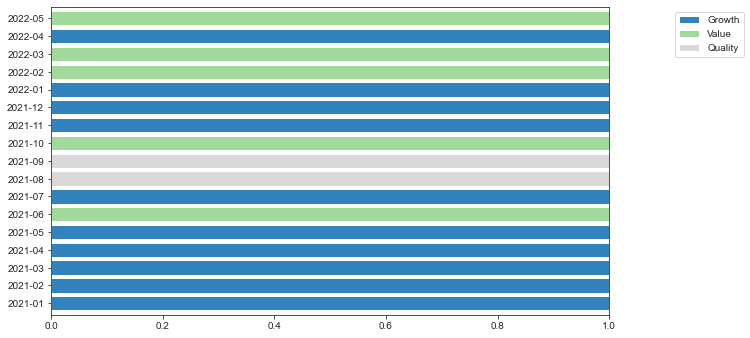

In [44]:
ufam.plot_weight([2021,2022]);

In [45]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Value    1.0
Name: 2022-04-29 00:00:00, dtype: float64

# US-DM-EM model

In [46]:
udem = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_test_0, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/137 [00:00<?, ?it/s]

5.944473028182983


<Figure size 432x288 with 0 Axes>

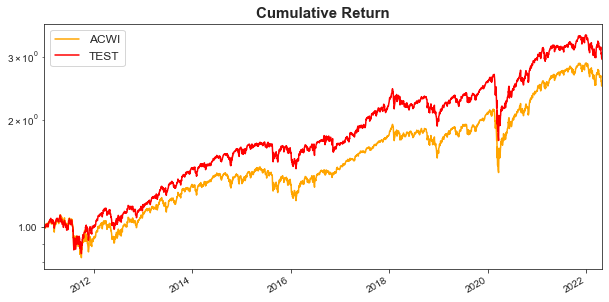

In [47]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

udem.plot_cum(strats, names=names, color=color, logy=True);

In [48]:
udem.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
US_Total,3.93,2853,12.73,17.39,0.73,-35.00,15.50,13.90,1.13,0.98,8.33,70.37,0.87,96.62
ACWI,2.48,2853,8.29,17.24,0.48,-33.53,11.32,13.91,0.74,1.00,20.31,64.44,0.92,91.16
EM,1.12,2853,0.99,21.90,0.05,-38.20,2.64,18.91,0.13,1.12,42.82,50.37,1.12,6.74
Global,1.57,2853,4.03,18.24,0.22,-34.98,6.24,14.32,0.35,1.02,34.45,57.78,0.96,72.56
DualMomentum,2.95,2853,9.93,17.78,0.56,-34.69,12.66,15.14,0.78,0.98,14.02,65.93,0.92,95.74


In [49]:
udem.weight.tail()

,US_Total,ACWI,EM,Global
2021-12-31,1.0,0.0,0.0,0.0
2022-01-31,1.0,0.0,0.0,0.0
2022-02-28,1.0,0.0,0.0,0.0
2022-03-31,1.0,0.0,0.0,0.0
2022-04-29,0.0,1.0,0.0,0.0
